# Makemore Video Notes

## Video 1

### Bigram

In [6]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name '_C' is not defined

In [3]:
names = open("./names.txt", "r").read().splitlines()

letters = sorted(list(set("".join(names))))
letter_encoder = {l: k+1 for k, l in enumerate(letters)}
letter_encoder["."] = 0
letter_decoder = {v:k for k,v in letter_encoder.items()}

In [4]:
N = torch.zeros((27,27), dtype= torch.int32)
for n in names:
    chs = "." + n + "."
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = letter_encoder[ch1]
        ix2 = letter_encoder[ch2]
        
        N[ix1, ix2] += 1

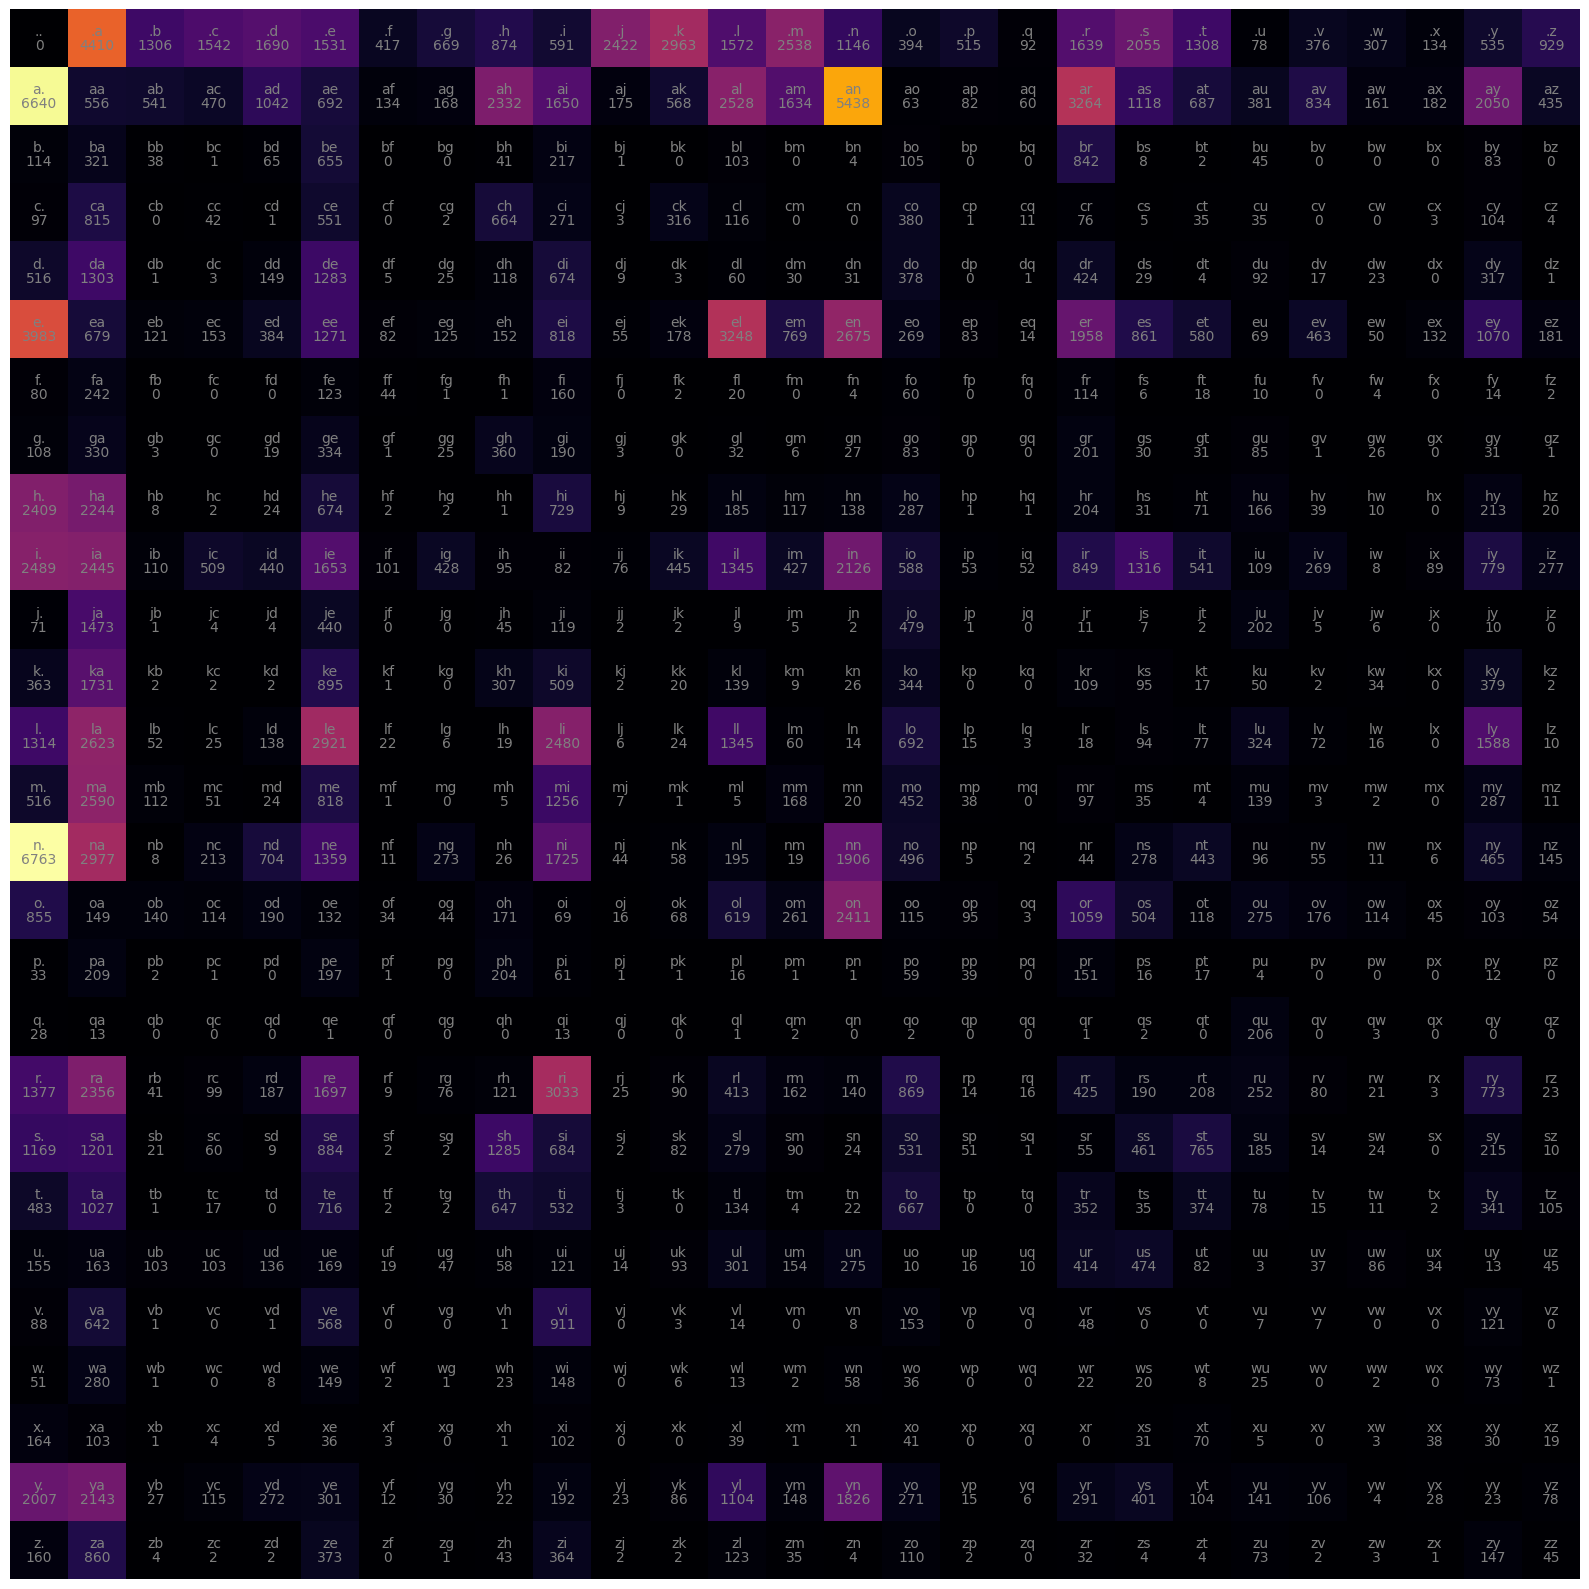

In [5]:
plt.figure(figsize= (16, 16))
plt.imshow(N, cmap= "inferno")

for i in range(27):
    for j in range(27):
        chstr = letter_decoder[i] + letter_decoder[j]
        plt.text(j, i, chstr, ha= "center", va= "bottom", color= "gray")
        plt.text(j, i, N[i,j].item(), ha= "center", va= "top", color= "gray")

plt.axis("off")
plt.tight_layout()

In [16]:
g = torch.Generator().manual_seed(2147483647)

P = (N + 1).float() # Model smoothing (1)
P /= P.sum(dim= 1, keepdim=True)
for i in range(20):
    ix = 0
    word = ""
    while True:
        p_dist = P[ix]
        ix = torch.multinomial(p_dist, num_samples= 1, replacement= True, generator= g).item()
        
        if ix != 0:
            word += letter_decoder[ix]
        
        else:
            break
        
    print(word)

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja


In [17]:
log_likelihood = 0.0
i = 0
for n in names[:3]:
    chs = "." + n + "."
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = letter_encoder[ch1]
        ix2 = letter_encoder[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        i += 1
        print(f"{ch1}{ch2}: {prob:.4f} {log_prob: .4f}")        

neg_log_likelihood = -log_likelihood 
print(neg_log_likelihood.item())
normalized_nll = neg_log_likelihood / i
print(normalized_nll.item())

.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
.o: 0.0123 -4.3965
ol: 0.0779 -2.5526
li: 0.1774 -1.7293
iv: 0.0152 -4.1845
vi: 0.3508 -1.0476
ia: 0.1380 -1.9807
a.: 0.1958 -1.6305
.a: 0.1376 -1.9835
av: 0.0246 -3.7041
va: 0.2473 -1.3971
a.: 0.1958 -1.6305
38.80856704711914
2.4255354404449463


### NN Bigram

In [24]:
import torch.nn.functional as F

In [42]:
# training set of bigrams (x,y)
xs, ys = [], []

for n in names:
    chs = "." + n + "."
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = letter_encoder[ch1]
        ix2 = letter_encoder[ch2]
        
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
xenc = F.one_hot(xs, num_classes= 27).float()
yenc = F.one_hot(ys, num_classes= 27).float()

W = torch.randn((27, 27))
logits = xenc @ W

# softmax activation
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [52]:
# example
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    
    print("-"*10)
    print(f"Bigram example {i+1}: {letter_decoder[x]}{letter_decoder[y]} (indexes {x}, {y})")
    print(f"Input into NN: {x}")
    print(f"Output probabilities from NN: \n{probs[i]}")
    print(f"Label: {y}")
    p = probs[i, y]
    print(f"Probability assigned by NN to the correct character: {p.item()}")
    logp = torch.log(p)
    print("Log Likelihood: ", logp.item())
    nll = - logp
    print("Negaitive Log Likelihood: ", nll.item())
    nlls[i] = nll
    
print("="*10)
print("Average Negative Log Likelihood = ", nlls.mean().item())

----------
Bigram example 1: .e (indexes 0, 5)
Input into NN: 0
Output probabilities from NN: 
tensor([0.0341, 0.0030, 0.0971, 0.0139, 0.0306, 0.0151, 0.0193, 0.0595, 0.1914,
        0.0551, 0.0077, 0.0100, 0.0392, 0.0141, 0.0330, 0.0486, 0.0289, 0.0069,
        0.0071, 0.0132, 0.0211, 0.0187, 0.0289, 0.0791, 0.0374, 0.0830, 0.0042])
Label: 5
Probability assigned by NN to the correct character: 0.015102197416126728
Log Likelihood:  -4.192914962768555
Negaitive Log Likelihood:  4.192914962768555
----------
Bigram example 2: em (indexes 5, 13)
Input into NN: 5
Output probabilities from NN: 
tensor([0.0211, 0.0033, 0.0327, 0.0518, 0.0116, 0.1248, 0.0054, 0.0090, 0.0733,
        0.0243, 0.0119, 0.0094, 0.0754, 0.0276, 0.0073, 0.0225, 0.0344, 0.0182,
        0.0122, 0.1268, 0.0416, 0.0158, 0.0844, 0.0761, 0.0176, 0.0571, 0.0047])
Label: 13
Probability assigned by NN to the correct character: 0.02762598916888237
Log Likelihood:  -3.588998317718506
Negaitive Log Likelihood:  3.588998317718506

#### Forward Pass

In [89]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator= g, requires_grad = True)

In [103]:
# gradient descent

n_iter = 100
for k in range(n_iter):
    # forward pass
    xenc = F.one_hot(xs, num_classes= 27).float()
    num = xenc.shape[0]
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims= True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.005*(W**2).mean() # l2 regularization term
    print(f"Iter {k+1}: {loss.item():.4f}")
    
    # backward pass
    W.grad = None
    loss.backward()
    W.data += -50 * W.grad

Iter 1: 2.4791
Iter 2: 2.4789
Iter 3: 2.4788
Iter 4: 2.4786
Iter 5: 2.4785
Iter 6: 2.4783
Iter 7: 2.4782
Iter 8: 2.4781
Iter 9: 2.4779
Iter 10: 2.4778
Iter 11: 2.4777
Iter 12: 2.4776
Iter 13: 2.4774
Iter 14: 2.4773
Iter 15: 2.4772
Iter 16: 2.4771
Iter 17: 2.4770
Iter 18: 2.4769
Iter 19: 2.4768
Iter 20: 2.4767
Iter 21: 2.4766
Iter 22: 2.4765
Iter 23: 2.4764
Iter 24: 2.4763
Iter 25: 2.4762
Iter 26: 2.4761
Iter 27: 2.4760
Iter 28: 2.4759
Iter 29: 2.4758
Iter 30: 2.4757
Iter 31: 2.4757
Iter 32: 2.4756
Iter 33: 2.4755
Iter 34: 2.4754
Iter 35: 2.4753
Iter 36: 2.4753
Iter 37: 2.4752
Iter 38: 2.4751
Iter 39: 2.4751
Iter 40: 2.4750
Iter 41: 2.4749
Iter 42: 2.4748
Iter 43: 2.4748
Iter 44: 2.4747
Iter 45: 2.4746
Iter 46: 2.4746
Iter 47: 2.4745
Iter 48: 2.4745
Iter 49: 2.4744
Iter 50: 2.4743
Iter 51: 2.4743
Iter 52: 2.4742
Iter 53: 2.4742
Iter 54: 2.4741
Iter 55: 2.4741
Iter 56: 2.4740
Iter 57: 2.4740
Iter 58: 2.4739
Iter 59: 2.4739
Iter 60: 2.4738
Iter 61: 2.4738
Iter 62: 2.4737
Iter 63: 2.4737
I

In [104]:
for i in range(10):
    name = ""
    ix = 0    
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes= 27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims= True)
        
        ix = torch.multinomial(p, 1, True, generator= g).item()
        
        if ix != 0:
            letter = letter_decoder[ix]
            name += letter
            
        else:
            break
    
    print(name)

ki
olyvitay
ren
balyduwpurighan
e
esuce
mo
duie
erie
iabentabenele


## Video 2

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("./names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set("".join(words))))
letter_encoder = {v:i for i,v in enumerate(chars, 1)}
letter_encoder["."] = 0
letter_decoder = {v:k for k, v in letter_encoder.items()}

In [5]:
printVals = False
block_size = 3

X, Y = [], []

for w in words:
    
    # print(w)
    context = [0] * block_size
        
    for ch in w + ".":
        ix = letter_encoder[ch]        
        X.append(context)
        Y.append(ix)
        
        if printVals:
            print("".join([letter_decoder[n] for n in context]), "-->", ch)
        
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [7]:
X[:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [8]:
C = torch.randn((27, 2))
print(C[7])
F.one_hot(torch.tensor(7), num_classes= 27).float() @ C

tensor([-0.9880, -0.4564])


tensor([-0.9880, -0.4564])

In [9]:
print(C[X].shape)
emb = C[X]
emb

torch.Size([228146, 3, 2])


tensor([[[-1.5209, -0.5496],
         [-1.5209, -0.5496],
         [-1.5209, -0.5496]],

        [[-1.5209, -0.5496],
         [-1.5209, -0.5496],
         [-0.4894, -0.0261]],

        [[-1.5209, -0.5496],
         [-0.4894, -0.0261],
         [-0.1415,  1.9342]],

        ...,

        [[ 0.7003,  1.3515],
         [ 0.7003,  1.3515],
         [-0.6062, -1.1032]],

        [[ 0.7003,  1.3515],
         [-0.6062, -1.1032],
         [ 0.7003,  1.3515]],

        [[-0.6062, -1.1032],
         [ 0.7003,  1.3515],
         [ 0.5298, -0.3438]]])

In [10]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [11]:
# torch.cat((emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]), 1)

In [12]:
# torch.cat(torch.unbind(emb, 1), 1)

In [13]:
emb.view(-1, 6).shape

torch.Size([228146, 6])

In [14]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h.shape

torch.Size([228146, 100])

In [15]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [16]:
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdim= True)
prob.shape

torch.Size([228146, 27])

In [17]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [18]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [19]:
# ------- Cleaner Implementation ------- #

In [20]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [21]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator= g)
W1 = torch.randn((6,100), generator= g)
b1 = torch.randn((100), generator= g)
W2 = torch.randn((100,27), generator= g)
b2 = torch.randn((27), generator= g)

params = [C, W1, b1, W2, b2]

In [22]:
sum([param.nelement() for param in params])

3481

In [28]:
for p in params:
    p.requires_grad = True

for _ in range(100):
    ix = torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    embs = C[X[ix]] # (32, 2, 3)
    h = torch.tanh(embs.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in params:
        p.grad = None

    loss.backward()
    for p in params:
        p.data += p.grad * -0.1
print(loss.item())

3.322375774383545


In [29]:
embs = C[X[ix]] # (32, 2, 3)
h = torch.tanh(embs.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y[ix])

loss.item()

2.7222061157226562

In [57]:
# Discovering learning rate

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator= g)
W1 = torch.randn((6,100), generator= g)
b1 = torch.randn((100), generator= g)
W2 = torch.randn((100,27), generator= g)
b2 = torch.randn((27), generator= g)

params = [C, W1, b1, W2, b2]

lre = torch.linspace(-3,0,1000)
lrs = 10 ** lre

lr_i, loss_i = [], []
for p in params:
    p.requires_grad = True

for i in range(1000):
    ix = torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    embs = C[X[ix]] # (32, 2, 3)
    h = torch.tanh(embs.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in params:
        p.grad = None

    loss.backward()
    
    # update
    lr = lrs[i].item()
    for p in params:
        p.data += p.grad * -lr
        
    lr_i.append(lre[i])
    loss_i.append(loss.item())
print(loss.item())

10.820581436157227


In [58]:
loss_i

[20.98151969909668,
 20.66375732421875,
 18.061418533325195,
 20.46146011352539,
 20.528024673461914,
 19.07593536376953,
 18.390125274658203,
 19.253267288208008,
 19.182159423828125,
 19.396089553833008,
 17.540189743041992,
 19.352170944213867,
 16.63265609741211,
 21.550369262695312,
 19.18523597717285,
 19.9658145904541,
 18.160268783569336,
 19.941600799560547,
 19.54155921936035,
 18.13107681274414,
 21.323530197143555,
 17.091529846191406,
 20.2586727142334,
 15.830826759338379,
 20.7294921875,
 18.116466522216797,
 18.087068557739258,
 17.134841918945312,
 19.64128875732422,
 17.969139099121094,
 19.164865493774414,
 16.38897132873535,
 16.579845428466797,
 20.979503631591797,
 17.979768753051758,
 17.60866355895996,
 18.01991844177246,
 18.55756187438965,
 16.053464889526367,
 16.86604118347168,
 20.043973922729492,
 17.246816635131836,
 21.3782901763916,
 16.335086822509766,
 21.200029373168945,
 21.30259132385254,
 17.828140258789062,
 19.15411949157715,
 17.344114303588867

0.1300511226981358

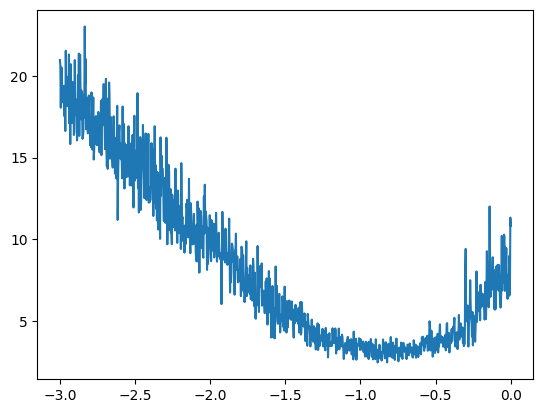

In [65]:
plt.plot(lr_i, loss_i)

10 ** lr_i[torch.argmin(torch.tensor(loss_i)).item()].item()

In [178]:
# final model

## hyperparams
embed_dims = 10
h_nuerons = 300

n1 = int(0.8 * X.shape[0])
n2 = int(0.9 * X.shape[0])
Xtr, Xdev, Xts = X.tensor_split((n1, n2), dim=0)
Ytr, Ydev, Yts = Y.tensor_split((n1, n2), dim=0)

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,embed_dims), generator= g)
W1 = torch.randn((embed_dims * 3,h_nuerons), generator= g)
b1 = torch.randn((h_nuerons), generator= g)
W2 = torch.randn((h_nuerons,27), generator= g)
b2 = torch.randn((27), generator= g)

params = [C, W1, b1, W2, b2]

lre = torch.linspace(-3,0,1000)
lrs = 10 ** lre

lr_i, loss_i = [], []
for p in params:
    p.requires_grad = True
    
sum([param.nelement() for param in params])

17697

In [179]:
for i in range(200_000):
    ix = torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass
    embs = C[Xtr[ix]] # (32, 2, 3)
    h = torch.tanh(embs.view(-1, embed_dims * 3) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in params:
        p.grad = None

    loss.backward()
    
    # update
    lr = -0.1 if i < 100_000 else -0.01
    for p in params:
        p.data += p.grad * lr
        
embs = C[Xtr]
h = torch.tanh(embs.view(-1, embed_dims * 3) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)

loss.item()

2.0785019397735596

In [180]:
embs = C[Xdev]
h = torch.tanh(embs.view(-1, embed_dims * 3) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)

loss.item()

2.425774097442627

In [181]:
embs = C[Xts]
h = torch.tanh(embs.view(-1, embed_dims * 3) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yts)

loss.item()

2.4753737449645996

In [185]:
for _ in range(10):
    
    out, context = [], [0] * block_size
    while True:
        embs = C[context]
        h = torch.tanh(embs.view(-1, embed_dims * 3) @ W1 + b1)
        logits = h @ W2 + b2
        
        probs = torch.softmax(logits, dim= 1)
        ix = torch.multinomial(probs, 1).item()
        if ix == 0:
            break
        
        context = context[1:] + [ix]
        out.append(ix)
        
        
    print("".join(letter_decoder[ix] for ix in out))

ollina
sofi
riggan
leah
elee
maderr
melin
taithanay
gre
mare


## Video 3

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
words = open("./names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [23]:
chars = sorted(list(set("".join(words))))
letter_encoder = {v:i for i,v in enumerate(chars, 1)}
letter_encoder["."] = 0
letter_decoder = {v:k for k, v in letter_encoder.items()}

In [24]:
block_size = 3

def build_dataset(words):
    X, Y = [], []
    
    for w in words:
        context = [0] * block_size
        
        for ch in w + ".":
            ix = letter_encoder[ch]
            X.append(context)
            Y.append(ix)
            
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)

random.shuffle(words)

X, Y = build_dataset(words)

n1 = int(0.8 * X.shape[0])
n2 = int(0.9 * X.shape[0])
Xtr, Xdev, Xts = X.tensor_split((n1, n2), dim=0)
Ytr, Ydev, Yts = Y.tensor_split((n1, n2), dim=0)

Xtr.shape, Ytr.shape

torch.Size([228146, 3]) torch.Size([228146])


(torch.Size([182516, 3]), torch.Size([182516]))

In [107]:
n_embd = 10
n_hidden = 200
vocab_len = 27

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((vocab_len, n_embd), generator= g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator= g)
W1 = torch.nn.init.kaiming_normal_(W1, nonlinearity= "tanh") # He initialization
# b1 = torch.randn(n_hidden, generator= g) NOTE: Bias is getting subtracted via BN
W2 = torch.randn((n_hidden, vocab_len), generator= g) * 0.01
b2 = torch.randn(vocab_len, generator = g) * 0

bn_gain = torch.ones((1, n_hidden))
bn_shift = torch.zeros((1, n_hidden))
bn_mean_running = torch.zeros((1, n_hidden))
bn_std_running = torch.ones((1, n_hidden))

parameters = [C, W1, W2, b2, bn_gain, bn_shift]
print(sum([p.nelement() for p in parameters]))

for p in parameters:
    p.requires_grad = True

12297


In [108]:
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    
    # mini-batching
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator = g)
    Xb = Xtr[ix]; Yb = Ytr[ix]
    
    # forward pass
    embs = C[Xb].view((-1, block_size * n_embd))
    
    ## linear layer
    hpreact = embs @ W1+ b1
    
    ## batch normalization
    # ------------------------------------------------------------------------
    bn_mean_i = hpreact.mean(0, True)
    bn_std_i = hpreact.std(0, True)
    hpreact = bn_gain * (hpreact - bn_mean_i) / bn_std_i + bn_shift
    
    with torch.no_grad():
        bn_mean_running = 0.999 * bn_mean_running + 0.001 * bn_mean_i
        bn_std_running = 0.999 * bn_std_running + 0.001 * bn_std_i
    # ------------------------------------------------------------------------
    
    ## non linearity
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Yb)
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()    
    
    # updating
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    if i % 10000 == 0:
        print(f'Step {i}/{max_steps}: Loss = {loss}')
    
    lossi.append(loss.log10().item())
    # break

Step 0/200000: Loss = 3.3200080394744873
Step 10000/200000: Loss = 1.8326845169067383
Step 20000/200000: Loss = 2.170287847518921
Step 30000/200000: Loss = 1.9957228899002075
Step 40000/200000: Loss = 2.336581230163574
Step 50000/200000: Loss = 2.2937891483306885
Step 60000/200000: Loss = 2.473076820373535
Step 70000/200000: Loss = 2.253713607788086
Step 80000/200000: Loss = 2.3562302589416504
Step 90000/200000: Loss = 2.1758615970611572
Step 100000/200000: Loss = 2.195777416229248
Step 110000/200000: Loss = 2.2966971397399902
Step 120000/200000: Loss = 2.1818604469299316
Step 130000/200000: Loss = 2.4969358444213867
Step 140000/200000: Loss = 2.096774101257324
Step 150000/200000: Loss = 1.6670761108398438
Step 160000/200000: Loss = 2.225761890411377
Step 170000/200000: Loss = 2.0185890197753906
Step 180000/200000: Loss = 1.8616836071014404
Step 190000/200000: Loss = 2.321777820587158


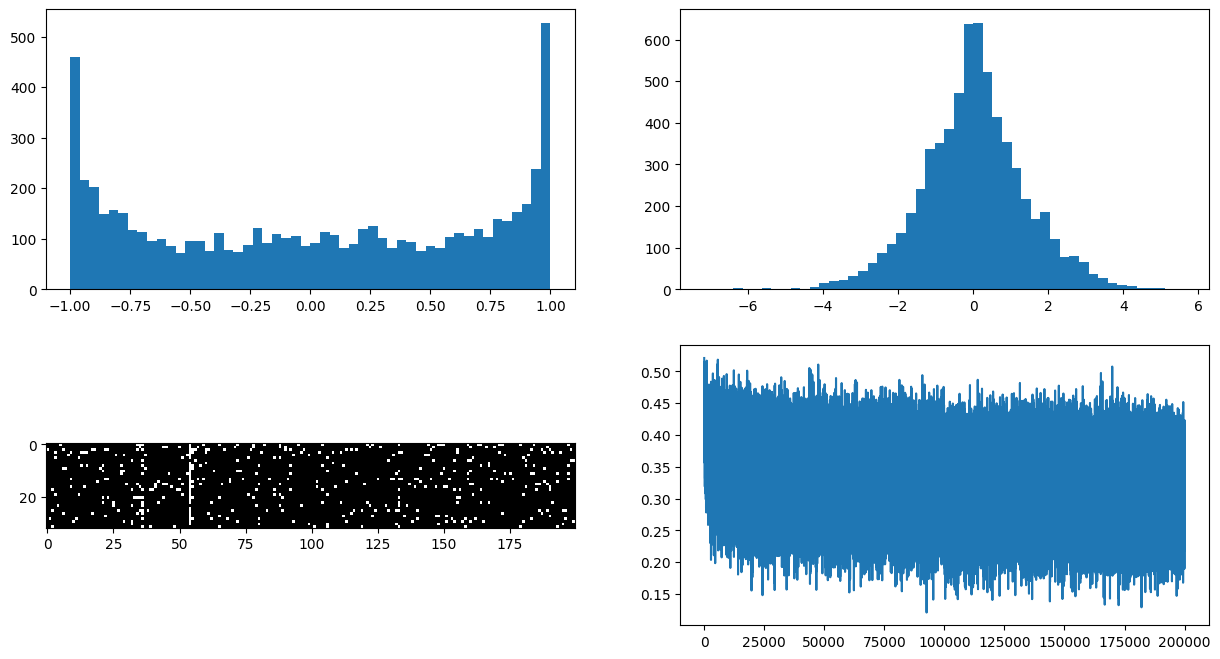

In [111]:
fig, axs = plt.subplots(2, 2, figsize= (15, 8))
axs[0,0].hist(h.view(-1).tolist(), 50)
axs[0,1].hist(hpreact.view(-1).tolist(), 50)
axs[1,0].imshow(h.abs() > 0.99, cmap= "gray", interpolation= "nearest")
axs[1,1].plot(lossi);

In [112]:
with torch.no_grad():
    emb = C[Xtr].view(Xtr.shape[0], -1)
    hpreact = emb @ W1 + b1
    
    bn_mean = hpreact.mean(0, True)
    bn_std = hpreact.std(0, True)

In [116]:
# print(bn_mean - bn_mean_running)
# print(bn_std - bn_std_running)

In [117]:
@torch.no_grad()

def split_loss(split: str):
    x, y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xts, Yts)
    }[split]
    
    emb = C[x].view(x.shape[0], -1)
    hpreact = emb @ W1 + b1
    hpreact = bn_gain * (hpreact - bn_mean_running) / bn_std_running + bn_shift
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    
    loss = F.cross_entropy(logits, y)
    print(f'{split.title()} Loss: {loss.item()}')

split_loss("train")    
split_loss("val")    

Train Loss: 2.0595531463623047
Val Loss: 2.108582019805908


In [88]:
g = torch.Generator().manual_seed(42)

n_ex = 20
for _ in range(n_ex):
    
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor(context)].view(1, -1)
        hpreact = emb @ W1 + b1
        h = torch.tanh(hpreact)
        logits = h @ W2 + b2
        probs = F.softmax(logits, 1)
        ix = torch.multinomial(probs, 1, generator= g).item()
        
        if ix == 0:
            break
        
        out.append(ix)
        context = context[1:] + [ix]
    
    print("".join([letter_decoder[ix] for ix in out]).title())

Anuelen
Tis
Marian
Dan
Shawn
Kalynn
Aremarce
Man
Epince
Den
Dmon
Kend
Josedrigballa
Mari
Yalah
Vihia
Achance
Tian
Tiyan
Mar


In [202]:
class Linear:
    def __init__(self, fan_in, fan_out, bias= True):
        self.weight = torch.randn((fan_in, fan_out)) / fan_in ** 0.5
        self.bias = torch.zeros(fan_out) if bias else None
        
    def __call__(self, x):
        self.out = x @ self.weight
        if self.bias is not None:
            self.out += self.bias
        return self.out
    
    def parameters(self):
        return [self.weight] + ([] if self.bias is None else [self.bias])
    
class BatchNorm1d:
    def __init__(self, dim, eps = 1e-5, momentum= 0.01):
        self.momentum = momentum
        self.eps = eps
        self.training = True
        
        self.gamma = torch.zeros(dim)
        self.beta = torch.zeros(dim)
        
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.zeros(dim)
        
    def __call__(self, x: torch.Tensor):
        if self.training:
            x_mean = x.mean(dim= 0, keepdims= True)
            x_var = x.var(dim= 0, keepdims= True, unbiased= True)
        
        else:
            x_mean = self.running_mean
            x_var = self.running_std
            
        x_hat = (x - x_mean) / torch.sqrt(x_var + self.eps)
        self.out = self.gamma * x_hat + self.beta
        
        if self.training:
            with torch.no_grad():
                self.running_mean = self.running_mean * (1 - self.momentum) + self.momentum * x_mean
                self.running_var = self.running_var * (1 - self.momentum) + self.momentum * x_var
        
        return self.out
    
    def parameters(self):
        return [self.beta, self.gamma]
    
class Tanh:
    def __call__(self, X):
        self.out = torch.tanh(X)
        return self.out
    def parameters(self):
        return []
    
n_emb = 10
n_hidden = 100
vocab_len = 27
block_size = 3
g = torch.Generator().manual_seed(42)

C = torch.randn((vocab_len, n_emb), generator = g)
layers = [
    Linear(n_emb * block_size, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden, n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden, vocab_len), BatchNorm1d(vocab_len)
]

with torch.no_grad():
    layers[-1].gamma *= 0.1
    for l in layers[:-1]:
        if isinstance(l, Linear):
            l.weight *= 5/3

params = [C] + [p for l in layers for p in l.parameters()]
print(sum([p.nelement() for p in params]))
for p in params:
    p.requires_grad = True
        

47551


In [203]:
max_steps = 200000
batch_size = 32
lossi = []
ud = []

for i in range(max_steps):
    
    # mini-batching
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator = g)
    Xb = Xtr[ix]
    Yb = Ytr[ix]
    
    # forward pass
    x = C[Xb].view(Xb.shape[0], -1)
    for l in layers:
        x = l(x)
    loss = F.cross_entropy(x, Yb)
    
    # backward pass
    for layer in layers:
        layer.out.retain_grad()
    for p in params:
        p.grad = None
    loss.backward()
    
    # update
    lr = 0.1 if i < 100000 else 0.01
    for p in params:
        p.data += -lr * p.grad
    
    if i % 10000 == 0:
        print(f'Step {i}/{max_steps}: Loss = {loss}')
    
    lossi.append(loss.log10().item())
    with torch.no_grad():
        ud.append([(lr * p.grad.std() / p.data.std()).log10().item() for p in params])
    if i > 1000:
        break # AFTER_DEBUG: Remove this line
    

Step 0/200000: Loss = 3.295837163925171


Tanh 2: mean= 0.0006809479091316462, std= 0.644228458404541, saturated=  2.81%
Tanh 5: mean= 0.0017849860014393926, std= 0.643417477607727, saturated=  2.81%
Tanh 8: mean= 0.0005023088888265193, std= 0.6435385346412659, saturated=  3.03%
Tanh 11: mean= 0.004695740528404713, std= 0.6391090750694275, saturated=  2.88%
Tanh 14: mean= -0.0007880383636802435, std= 0.6361737847328186, saturated=  2.97%


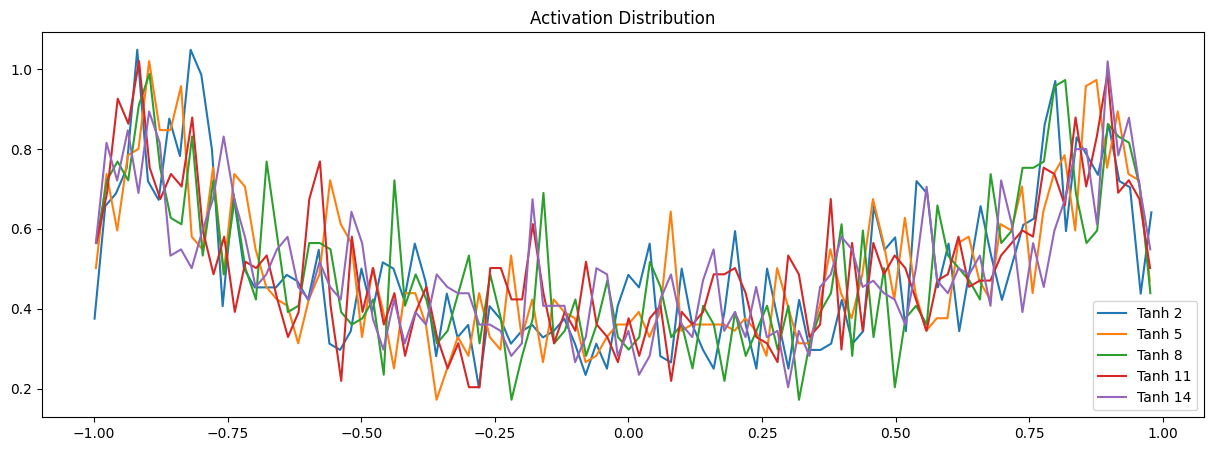

In [199]:
plt.figure(figsize= (15, 5))
legends = []
for i, l in enumerate(layers[:-1]):
    if isinstance(l, Tanh):
        t = l.out
        print(f"{l.__class__.__name__} {i}: mean= {t.mean()}, std= {t.std()}, saturated= {(torch.abs(t) > 0.97).float().mean() * 100: 0.2f}%")
        legends.append(f"{l.__class__.__name__} {i}")
        hy, hx = torch.histogram(t, density= True)
        plt.plot(hx[:-1].detach().numpy(), hy.detach().numpy())
    
plt.legend(legends)
plt.title("Activation Distribution");

Tanh 2: mean= 0.0, std= 0.0
Tanh 5: mean= 0.0, std= 0.0
Tanh 8: mean= 0.0, std= 0.0
Tanh 11: mean= 0.0, std= 0.0
Tanh 14: mean= 0.0, std= 0.0


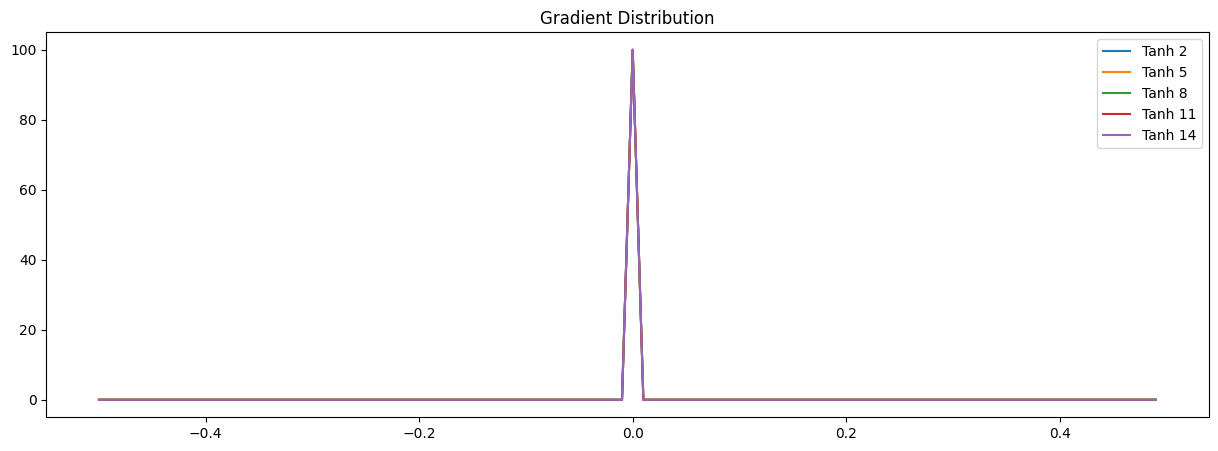

In [194]:
plt.figure(figsize= (15, 5))
legends  = []
for i, l in enumerate(layers):
    if isinstance(l, Tanh):
        t = l.out.grad
        print(f"{l.__class__.__name__} {i}: mean= {t.mean()}, std= {t.std()}")
        legends.append(f"{l.__class__.__name__} {i}")
        hy, hx = torch.histogram(t, density= True)
        plt.plot(hx[:-1].detach().numpy(), hy.detach().numpy())
plt.legend(legends)
plt.title("Gradient Distribution");

(27, 10), mean=  0.000000, std= 0.000000, grad:data ratio=  0.000000
(30, 100), mean=  0.000000, std= 0.000000, grad:data ratio=  0.000000
(100, 100), mean=  0.000000, std= 0.000000, grad:data ratio=  0.000000
(100, 100), mean=  0.000000, std= 0.000000, grad:data ratio=  0.000000
(100, 100), mean=  0.000000, std= 0.000000, grad:data ratio=  0.000000
(100, 100), mean=  0.000000, std= 0.000000, grad:data ratio=  0.000000
(100, 27), mean=  0.000000, std= 0.000000, grad:data ratio=  0.000000


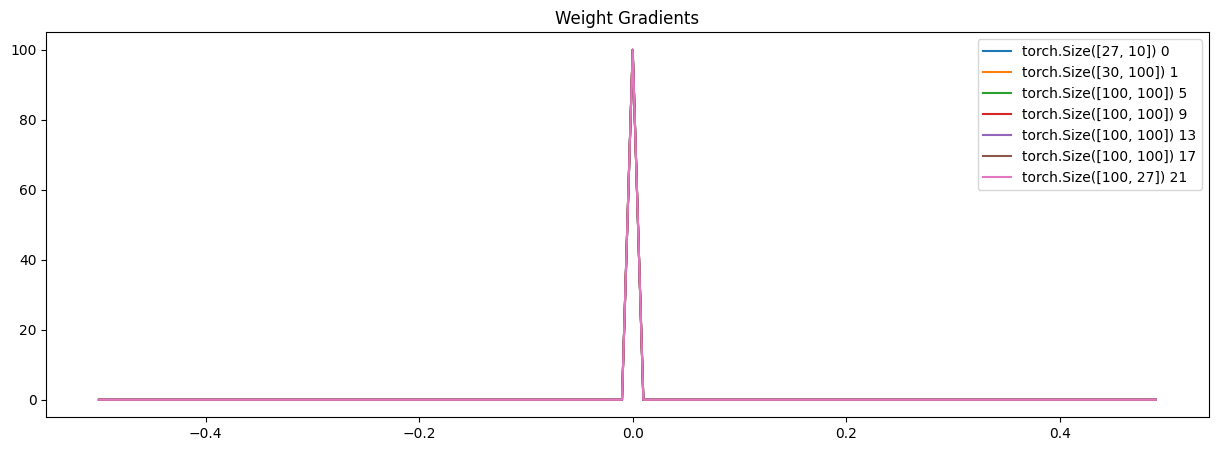

In [195]:
plt.figure(figsize= (15, 5))
legends = []
for i, p in enumerate(params):
    t = p.grad
    if p.ndim == 2:
        print(f"{tuple(p.shape)}, mean= {t.mean(): 5f}, std= {t.std():5f}, grad:data ratio= {t.std() / p.std(): 5f}")
        hy, hx = torch.histogram(t.view(-1), density= True)
        plt.plot(hx[:-1].detach().numpy(), hy.detach().numpy())
        legends.append(f"{p.shape} {i}")
plt.legend(legends)
plt.title("Weight Gradients");

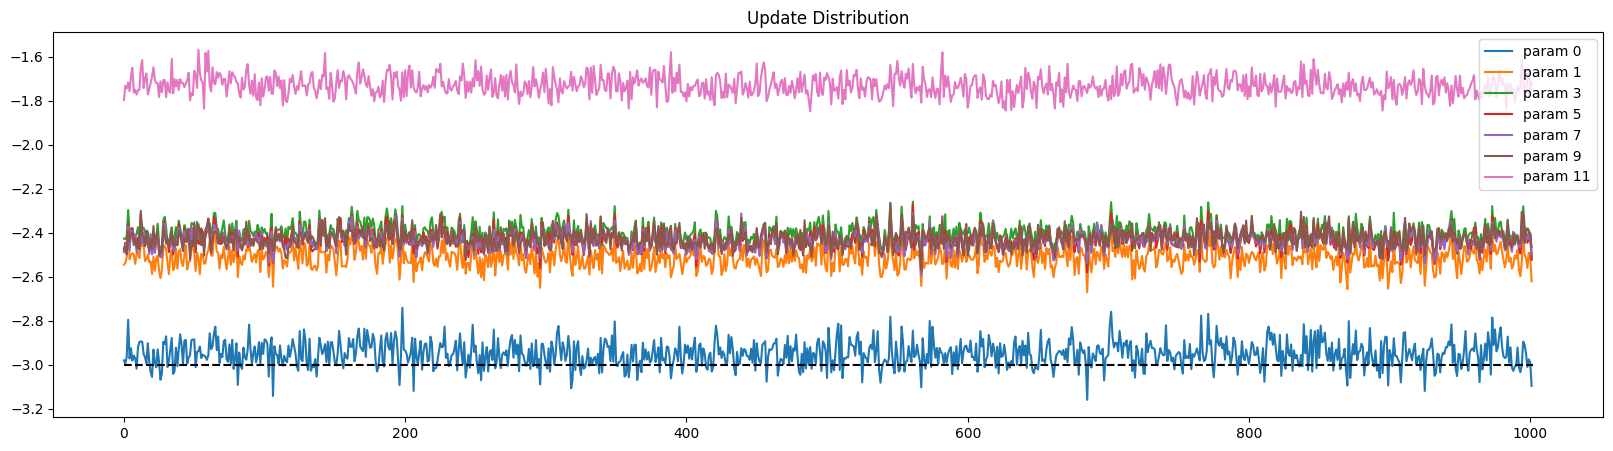

In [183]:
plt.figure(figsize= (20, 5))
legends = []
for i, p in enumerate(params):
    t = p.grad
    if p.ndim == 2:
        plt.plot([ud[j][i] for j in range(len(ud))])
        legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k--')
plt.legend(legends)
plt.title("Update Distribution");